In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_player =  pd.read_csv("all_seasons.csv", index_col="Rk")
all_player = all_player[['player_name', 'college']]
all_player.rename(columns={'player_name': 'Player'}, inplace=True)
all_player = all_player.drop_duplicates(subset=['Player'])
contract = pd.read_csv("sportsref_download.csv", index_col="Rk")
contract = contract[['Player', 'Tm', '2023-24', 'Guaranteed']]
colleges = [
    "Kentucky", "North Carolina", "Duke", "Kansas", "UCLA", "Louisville",
    "Arizona", "Indiana", "Michigan State", "Ohio State", "Syracuse",
    "Cincinnati", "Michigan", "Illinois", "Villanova", "Notre Dame",
    "Purdue", "Maryland", "Marquette", "Georgetown", "Gonzaga", "Oklahoma",
    "Utah", "UConn", "Arkansas"
]

In [3]:
main_data = pd.merge(all_player, contract, on='Player')
main_data = main_data.drop_duplicates(subset=['Player'])
main_data['2023-24'] = main_data['2023-24'].replace('[\$,]', '', regex=True).astype(float)
main_data['Guaranteed'] = main_data['Guaranteed'].replace('[\$,]', '', regex=True).astype(float)

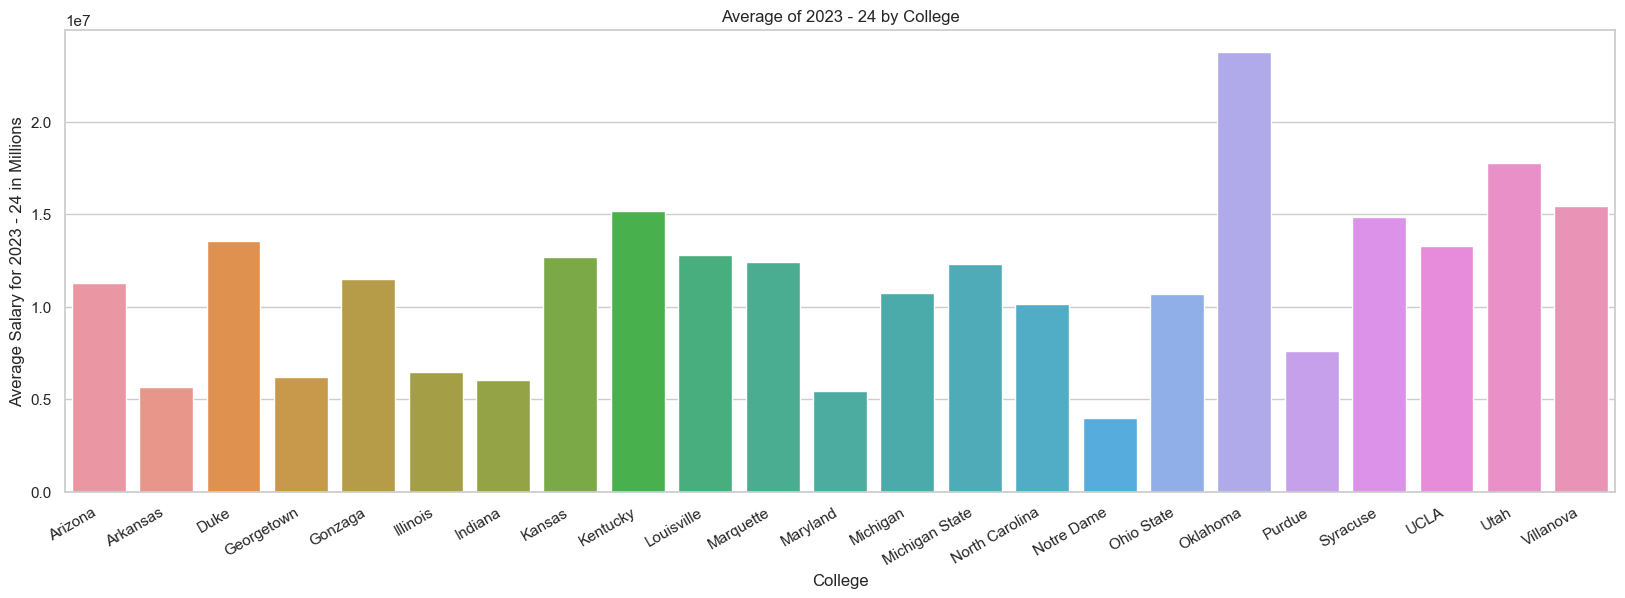

In [7]:

top_25_colleges = main_data[main_data['college'].isin(colleges)]
college_averages = top_25_colleges.groupby('college')['2023-24'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='college', y='2023-24', data=college_averages)
ax.set_title('Average of 2023 - 24 salary by College')
ax.set_xlabel('College')
ax.set_ylabel('Average Salary for 2023 - 24 in Millions')
plt.xticks(rotation=30, ha='right')
plt.show()

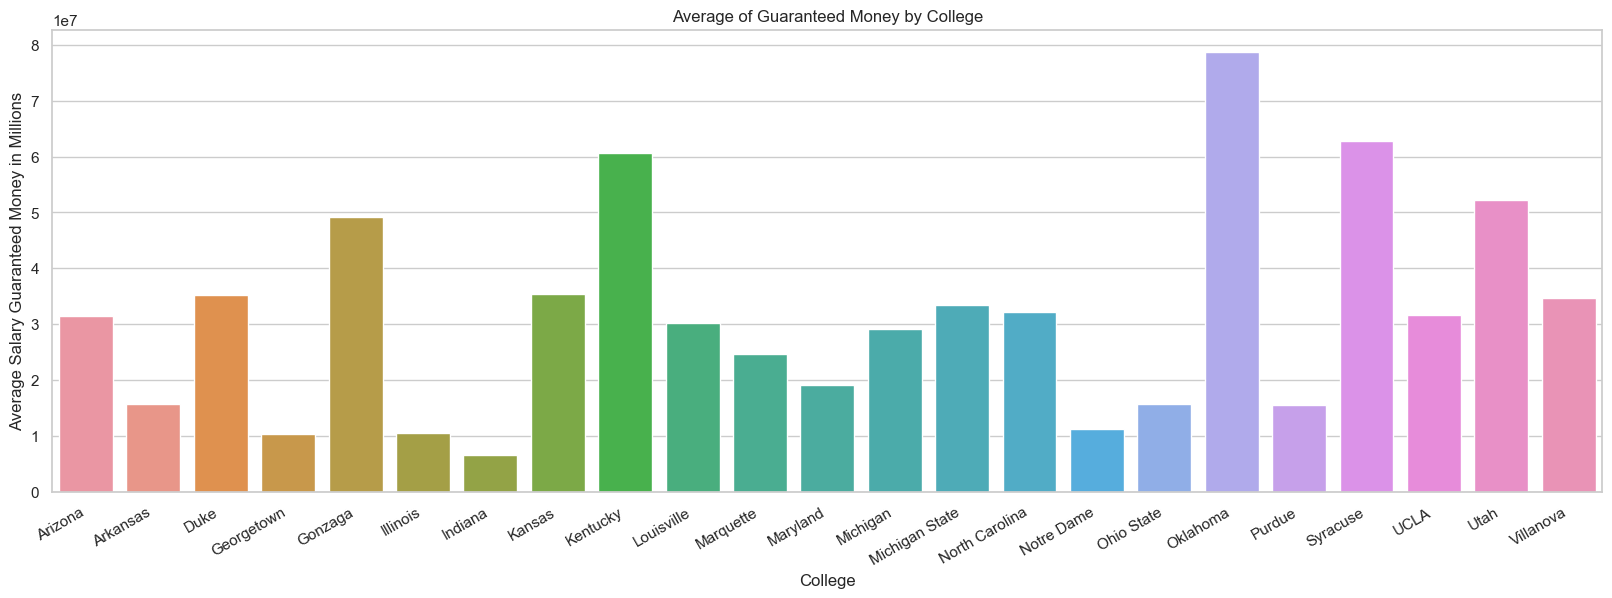

In [8]:
top_25_colleges = main_data[main_data['college'].isin(colleges)]
college_averages = top_25_colleges.groupby('college')['Guaranteed'].mean().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='college', y='Guaranteed', data=college_averages)
ax.set_title('Average of Guaranteed Money by College')
ax.set_xlabel('College')
ax.set_ylabel('Average Salary Guaranteed Money in Millions')
plt.xticks(rotation=30, ha='right')
plt.show()